# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime as dt
from scipy.stats import linregress

import json
#import config

# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv")
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from ratelimit import limits

import requests

# one_minute = 60

# @limits(calls=60, period=one_minute)
# def call_api(url):
#     response = requests.get(url)

#     if response.status_code != 200:
#         raise Exception('API response: {}'.format(response.status_code))
#     return response

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


# Set url for API
#url = 'api.openweathermap.org'
url = "http://api.openweathermap.org/data/2.5/weather?"
#city_name = response_json["name"]
# Loop through each city
test =  ["Houston"]
results = []
for city in test:
    # Try to grab the weather check on each city
    #query_url = url + "/data/2.5/weather?q={city}&appid={api_key}"
    #query_url = f"{url}q={city}&appid={api_key}"
    query_url = f"{url}appid={api_key}&q={city}"
    response = requests.get(query_url)
    response_json = response.json()

print (json.dumps(response_json, indent = 4))   
print(response_json)

#test retrieval of data using test city
weather_id=response_json["weather"][0]["id"]
city_id = response_json["id"]
city_name_test = response_json["name"]
print(city_id,name)

    try:
        results.append(response_json)
        print(city_id, name)
       
    except:
        print("Not found.")
        pass

    

In [3]:

#
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = []
lat =[]
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []
# Loop through each city
#print(city_id,name)
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}"
    
    try: 
        loop_response = requests.get(query_url).json()
        city_name.append(loop_response["name"])
        lat.append(loop_response["coord"]["lat"])
        lng.append(loop_response["coord"]["lon"])
        max_temp.append(loop_response["main"]["temp_max"])
        humidity.append(loop_response["main"]["humidity"])
        cloudiness.append(loop_response["clouds"]["all"])
        wind_speed.append(loop_response["wind"]["speed"])
        country.append(loop_response["sys"]["country"])
        date.append(loop_response["dt"])                    
        print(loop_response["id"],loop_response["name"])
    except:
        print("Not found.")
        pass

2264557 Ponta do Sol
5855927 Hilo
986717 Kruisfontein
3691954 Sechura
1015776 Bredasdorp
5282297 Bethel
3471451 Arraial do Cabo
2910302 Harrislee
Not found.
5924351 Clyde River
3398480 Gurupá
2019935 Mnogovershinnyy
4161075 LaBelle
3893629 Coquimbo
2074865 Carnarvon
4034551 Faanui
5588842 Chubbuck
5122534 Jamestown
2126123 Chokurdakh
Not found.
1685422 Sulangan
368246 Raja
3924948 Ouro Preto do Oeste
Not found.
1811764 Duyun
6201424 Mataura
Not found.
4020109 Atuona
2112802 Hasaki
2206939 Bluff
2155415 New Norfolk
5880054 Barrow
4032243 Vaini
Not found.
3831208 Qaanaaq
3468732 Buritis
2618795 Klaksvík
2122104 Petropavlovsk-Kamchatskiy
5866583 Saint Paul Harbor
3529654 Dzilam González
3874787 Punta Arenas
6445060 Sainte-Maxime
5546220 Saint George
2449893 Tessalit
3424607 Tasiilaq
2110227 Butaritari
3395062 Maués
3833367 Ushuaia
2311968 Nioki
934322 Mahébourg
5919850 Chapais
2163355 Hobart
Not found.
286621 Salalah
3418910 Upernavik
2327827 Ogaminana
1791779 Wanning
2071860 Esperance
27

5520076 Del Rio
889191 Karoi
Not found.
2638664 Salisbury
Not found.
1494331 Pospelikha
4564070 Culebra
6089426 North Bay
1795166 Shima
3906478 Reyes
2112309 Katsuura
Not found.
2038087 Chengde
2146219 Hervey Bay
3445782 Umuarama
3674676 Mitú
Not found.
1687186 Sarangani
1643837 Gorontalo
3374333 Praia
Not found.
934479 Grand Gaube
1233369 Negombo
481548 Troitsko-Pechorsk
4562996 Cabo Rojo
257859 Malia
5821086 Cheyenne
5072006 Lincoln
Not found.
1862505 Hirara
57000 Hobyo
6690296 Saint-Joseph
927967 Lilongwe
2028462 Ulaanbaatar
2206894 Hokitika
780687 Berlevåg
1529651 Altay
2715459 Falun
1687894 Santa Rosa
1056899 Sambava
3692073 Santiago de Cao
7669018 Aldergrove
553766 Kamenka
1790437 Zhuhai
3576994 Cockburn Town
3380290 Sinnamary
5380437 Pacific Grove
3578967 Le Moule
2347758 Bara
Not found.
707155 Kalynivka
2656847 Atherton
3355672 Lüderitz
2013918 Ust-Maya
3685335 Curumaní
3438102 Fuerte Olimpo
3420768 Qasigiannguit
2455290 Kidal
3868626 Valparaíso
1629001 Samarinda
2108502 Honiar

In [4]:
print(city_name)

['Ponta do Sol', 'Hilo', 'Kruisfontein', 'Sechura', 'Bredasdorp', 'Bethel', 'Arraial do Cabo', 'Harrislee', 'Clyde River', 'Gurupá', 'Mnogovershinnyy', 'LaBelle', 'Coquimbo', 'Carnarvon', 'Faanui', 'Chubbuck', 'Jamestown', 'Chokurdakh', 'Sulangan', 'Raja', 'Ouro Preto do Oeste', 'Duyun', 'Mataura', 'Atuona', 'Hasaki', 'Bluff', 'New Norfolk', 'Barrow', 'Vaini', 'Qaanaaq', 'Buritis', 'Klaksvík', 'Petropavlovsk-Kamchatskiy', 'Saint Paul Harbor', 'Dzilam González', 'Punta Arenas', 'Sainte-Maxime', 'Saint George', 'Tessalit', 'Tasiilaq', 'Butaritari', 'Maués', 'Ushuaia', 'Nioki', 'Mahébourg', 'Chapais', 'Hobart', 'Salalah', 'Upernavik', 'Ogaminana', 'Wanning', 'Esperance', 'Longyearbyen', 'Anchorage', 'Sabzawār', 'Matara', 'Constitución', 'Tadpatri', 'Celestún', 'Vardø', 'Beloha', 'Olinda', 'Manta', 'Ende', 'Port Hardy', 'Provideniya', 'Mar del Plata', 'Katangli', 'Varkaus', 'Turukhansk', 'San Quintín', 'Rikitea', 'Kearney', 'Voi', 'Oodweyne', 'Half Moon Bay', 'Paita', 'Grindavik', 'Mt. Ple

In [5]:
print(date)

[1607189664, 1607189517, 1607189664, 1607189664, 1607189665, 1607189665, 1607189423, 1607189665, 1607189665, 1607189665, 1607189665, 1607189665, 1607189665, 1607189665, 1607189665, 1607189666, 1607189421, 1607189666, 1607189666, 1607189666, 1607189666, 1607189666, 1607189666, 1607189666, 1607189666, 1607189666, 1607189667, 1607189427, 1607189667, 1607189667, 1607189667, 1607189667, 1607189667, 1607189667, 1607189667, 1607189606, 1607189667, 1607189439, 1607189667, 1607189668, 1607189668, 1607189668, 1607189668, 1607189668, 1607189668, 1607189668, 1607188866, 1607189668, 1607189669, 1607189669, 1607189669, 1607189669, 1607189622, 1607189669, 1607189669, 1607189669, 1607189669, 1607189669, 1607189669, 1607189669, 1607189669, 1607189670, 1607189670, 1607189594, 1607189407, 1607189670, 1607189670, 1607189670, 1607189670, 1607189670, 1607189497, 1607189671, 1607189590, 1607189671, 1607189671, 1607189671, 1607189671, 1607189671, 1607189671, 1607189671, 1607189671, 1607189672, 1607189672, 160

In [6]:
print(loop_response)

{'coord': {'lon': 11.86, 'lat': -4.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 302.9, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1009, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1607189721, 'sys': {'type': 1, 'id': 2025, 'country': 'CG', 'sunrise': 1607143920, 'sunset': 1607188498}, 'timezone': 3600, 'id': 2258378, 'name': 'Loandjili', 'cod': 200}


city_dict["City"] = [loop_results[i]["name"] for i in range(len(loop_results))]
city_dict["Lat"] = [loop_results[i]["coord"]["lat"] for i in range(len(loop_results))]
city_dict["Lng"] = [loop_results[i]["coord"]["lon"] for i in range(len(loop_results))]
city_dict["Max Temp"] = [loop_results[i]["main"]["temp_max"] for i in range(len(loop_results))]
city_dict["Humidity"] = [loop_results[i]["main"]["humidity"] for i in range(len(loop_results))]
city_dict["Cloudiness"] = [loop_results[i]["clouds"]["all"] for i in range(len(loop_results))]
city_dict["Wind Speed"] = [loop_results[i]["wind"]["speed"]for i in range(len(loop_results))]
city_dict["Country"] = [loop_results[i]["sys"]["country"] for i in range(len(loop_results))]
city_dict["Date"] = [loop_results[i]["dt"] for i in range(len(loop_results))]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}
weather_df = pd.DataFrame(city_dict)
weather_df.to_csv(r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv", index = False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.67,-17.10,288.15,72,40,4.60,PT,1607189664
1,Hilo,19.73,-155.09,294.26,73,1,3.60,US,1607189517
2,Kruisfontein,-34.00,24.73,292.59,81,19,1.34,ZA,1607189664
3,Sechura,-5.56,-80.82,298.02,60,98,5.45,PE,1607189664
4,Bredasdorp,-34.53,20.04,292.15,72,32,6.70,ZA,1607189665


In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.166600,14.767418,286.072855,72.421818,51.721818,3.592127,1.607190e+09
std,32.926471,89.789722,15.291619,20.095679,37.270107,2.463313,9.005141e+01
min,-54.800000,-179.170000,238.510000,15.000000,0.000000,0.130000,1.607189e+09
25%,-7.377500,-63.695000,276.067500,62.000000,12.000000,1.682500,1.607190e+09
50%,21.715000,15.110000,290.555000,77.000000,58.000000,3.060000,1.607190e+09
75%,47.820000,94.410000,298.510000,88.000000,89.000000,4.837500,1.607190e+09
max,78.220000,178.420000,308.630000,100.000000,100.000000,14.320000,1.607190e+09


In [18]:
len(weather_df)

550

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_df.drop(index = , inplace =False)
#clean_city_data

In [11]:
under_100 = weather_df.loc[weather_df["Humidity"]<= 100]
clean_city_data = under_100
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.67,-17.10,288.15,72,40,4.60,PT,1607189664
1,Hilo,19.73,-155.09,294.26,73,1,3.60,US,1607189517
2,Kruisfontein,-34.00,24.73,292.59,81,19,1.34,ZA,1607189664
3,Sechura,-5.56,-80.82,298.02,60,98,5.45,PE,1607189664
4,Bredasdorp,-34.53,20.04,292.15,72,32,6.70,ZA,1607189665
...,...,...,...,...,...,...,...,...,...
545,Mata,40.68,-7.46,279.82,84,85,2.68,PT,1607189721
546,Gashua,12.87,11.05,301.20,18,37,3.73,NG,1607189721
547,Knysna,-34.04,23.05,291.15,82,20,4.10,ZA,1607189721
548,Namtsy,62.72,129.67,249.15,76,0,2.00,RU,1607189721


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

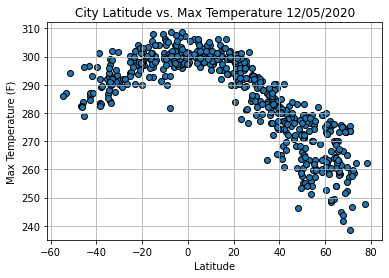

In [49]:
latitude = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, max_temp, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

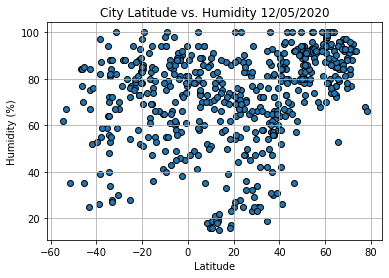

In [53]:
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, humidity, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Humidity.png")
plt.show()

In [14]:
#Describe results

## Latitude vs. Cloudiness Plot

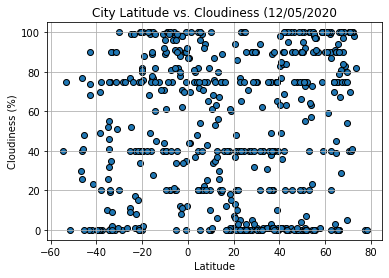

In [54]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, cloudiness, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Cloudiness.png")
plt.show()

In [16]:
#Describe results

## Latitude vs. Wind Speed Plot

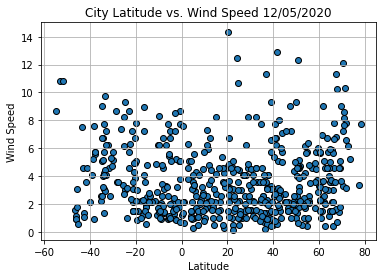

In [56]:
latitude = clean_city_data["Lat"]
winds = clean_city_data["Wind Speed"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, winds, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Wind Speed.png")
plt.show()

In [ ]:
#Describe results

## Linear Regression

In [26]:
#Use loc to get data for each hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7849792478199771


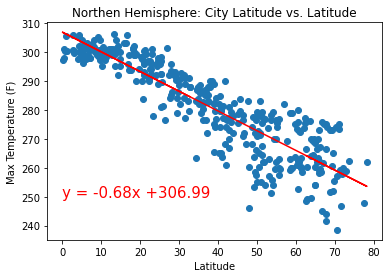

In [65]:
north_lat = northern_hemisphere["Lat"]
north_max_temp =northern_hemisphere["Max Temp"]
plt.scatter(north_lat, north_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northen Hemisphere: City Latitude vs. Latitude")

# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_max_temp)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(0,250), fontsize = 15, color = "red")
plt.savefig("Northen Hemisphere-City Latitude vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47442626103989755


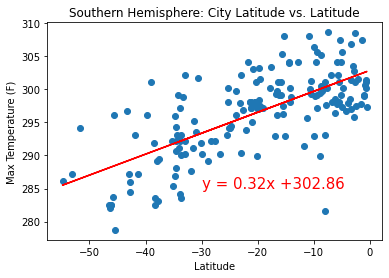

In [61]:
south_lat = southern_hemisphere["Lat"]
south_max_temp = southern_hemisphere["Max Temp"]
plt.scatter(south_lat, south_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: City Latitude vs. Latitude")
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_max_temp)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(-30,285), fontsize = 15, color = "red")
plt.savefig("Sotuhern Hemisphere: City Latitude vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression